In [27]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from datetime import datetime, timedelta
!pip install windrose
from windrose import WindroseAxes
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd '/content/drive/My Drive/Colab Notebooks/ESCI491'

/content/drive/My Drive/Colab Notebooks/ESCI491


In [0]:
df = pd.read_csv('SPOT-0206_History.csv')
df = df.sort_index(ascending=False)
time = df['Epoch Time']
time = np.asarray(time)
time = [datetime.fromtimestamp(tt).strftime('%Y-%m-%d %H:%M:%S') for tt in time]
df.index = time


In [42]:
df

,Battery Voltage (V),Power (W),Humidity (%rel),Epoch Time,Significant Wave Height (m),Peak Period (s),Mean Period (s),Peak Direction (deg),Peak Directional Spread (deg),Mean Direction (deg),Mean Directional Spread (deg),Latitude (deg),Longitude (deg)
2020-02-07 17:12:55,4.1,-0.38,24.8,1581095575,1.65,20.48,14.02,359.585,75.365,319.044,75.265,48.75920,-122.49462
2020-02-07 17:42:55,4.1,-0.38,24.8,1581097375,0.27,34.12,8.66,174.950,59.800,167.932,74.926,48.75937,-122.49447
2020-02-07 18:12:55,4.1,-0.29,26.4,1581099175,0.57,12.80,11.70,22.885,71.967,10.565,70.145,48.75650,-122.49672
2020-02-07 18:42:55,4.1,-0.29,26.4,1581100975,0.08,20.48,4.98,90.000,80.671,117.300,79.635,48.74087,-122.54955
2020-02-07 19:12:55,4.1,0.27,26.4,1581102775,0.14,14.62,5.02,213.959,78.654,53.130,80.432,48.74172,-122.54867
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28 15:14:01,4.1,-0.03,31.2,1590678841,0.06,1.82,2.30,134.222,50.532,125.667,70.104,48.74175,-122.54877
2020-05-28 15:44:01,4.1,-0.03,28.0,1590680641,0.08,2.12,2.32,113.875,37.789,125.002,59.443,48.74182,-122.54882
2020-05-28 16:14:01,4.1,-0.03,28.0,1590682441,0.06,3.64,2.26,189.137,31.436,131.708,64.152,48.74185,-122.54873
2020-05-28 16:44:01,4.1,-0.03,24.0,1590684241,0.06,2.56,2.32,97.883,33.025,106.616,66.752,48.74188,-122.54865


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 <a list of 8 Text major ticklabel objects>)

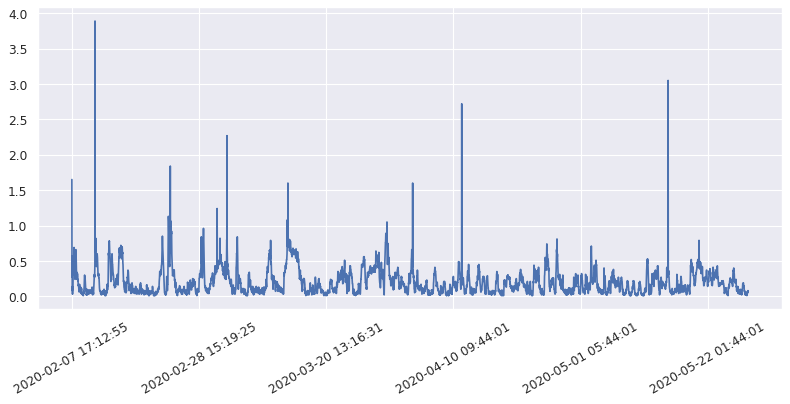

In [46]:
f = plt.figure(num=None, figsize=(12,5), dpi=80)
df['Significant Wave Height (m)'].plot()
plt.xticks(rotation=30)

#'2012-09-13 14:22:50'

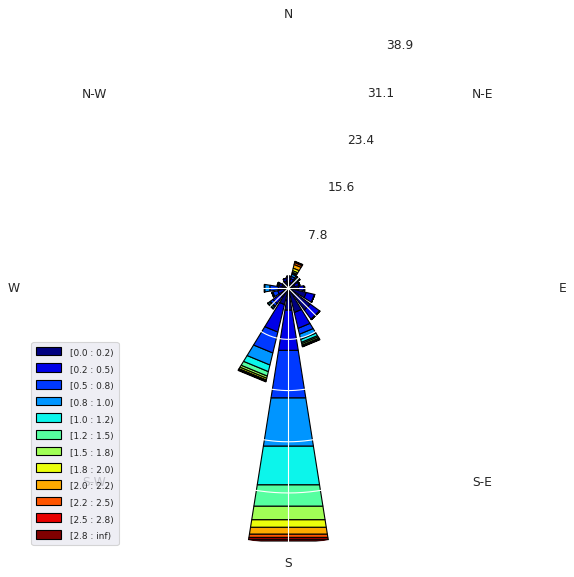

In [45]:
m2ft=3.28084
ax = WindroseAxes.from_ax()
ax.bar(df['Mean Direction (deg)'], df['Significant Wave Height (m)']*m2ft, bins=np.arange(0,3,0.25), normed=True, opening=0.8, edgecolor='black')
ax.set_legend()

My edits end here!

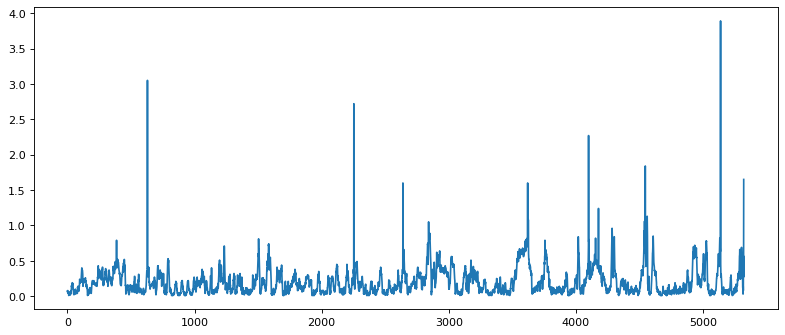

In [0]:
f = plt.figure(num=None, figsize=(12,5), dpi=80)
(ax1) = f.subplots(1, sharex=True)
plt.sca(ax1)
df['Significant Wave Height (m)'].plot()


In [0]:
import csv
import requests
import seaborn as sns
import datetime
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Download Bellingham Wind Sensor Data (https://geoport.usgs.esipfed.org/erddap/tabledap/wind-bel.graph)

# Download all data
# url = 'https://geoport.usgs.esipfed.org/erddap/tabledap/wind-bel.csv?time%2Cboardtemp%2CDm%2CSm%2CPa%2CTa%2CUa%2CRc' 

# Download just last 10-days
now = datetime.datetime.utcnow()-datetime.timedelta(days=100)
timestr = 'time%3E={:d}-{:02d}-{:02d}T{:02d}%3A00%3A00Z'.format(now.year,now.month,now.day,now.hour)
url = 'https://geoport.usgs.esipfed.org/erddap/tabledap/wind-bel.csv?time%2Cboardtemp%2CDm%2CSm%2CPa%2CTa%2CUa%2CRc&' + timestr
df_1 = pd.read_csv(url)
print(url)

https://geoport.usgs.esipfed.org/erddap/tabledap/wind-bel.csv?time%2Cboardtemp%2CDm%2CSm%2CPa%2CTa%2CUa%2CRc&time%3E=2020-02-23T22%3A00%3A00Z


In [0]:
# See what's inside (the most recent observations)
df_1.tail()

,time,boardtemp,Dm,Sm,Pa,Ta,Ua,Rc
4591,2020-06-02T21:00:00Z,17.0,267,5.0,1022.2,11.8,75.9,125.16
4592,2020-06-02T21:15:00Z,16.5,276,3.1,1022.7,11.7,79.4,125.2
4593,2020-06-02T21:30:00Z,16.25,198,1.1,1022.4,11.7,80.7,125.3
4594,2020-06-02T21:45:00Z,16.0,138,1.1,1022.4,11.7,82.2,125.44
4595,2020-06-02T22:00:00Z,16.5,129,1.9,1022.4,11.7,79.6,125.58


In [0]:
df_1.head()

,time,boardtemp,Dm,Sm,Pa,Ta,Ua,Rc
0,UTC,degree_C,degree,m s-1,Pa,degree_C,percent,mm
1,2020-04-15T21:45:00Z,23.75,292,10.1,1023.6,14.1,50.3,0.14
2,2020-04-15T22:00:00Z,24.5,295,9.7,1023.4,14.5,49.8,0.17
3,2020-04-15T22:15:00Z,23.0,301,10.5,1023.1,14.8,49.0,0.17
4,2020-04-15T22:30:00Z,24.25,305,9.3,1022.9,14.8,54.7,0.17


In [0]:
df_1 = df_1.drop(0)

In [0]:
# Now let's use th time as the index, this will making plotting easier
df_1.set_index('time',inplace=True)
# We also need to tell pandas that this time stamp is a datetime
df_1.index = pd.to_datetime(df_1.index)
# Now let's convert from GMT (UTC) time to local time
df_1.index = df_1.index - datetime.timedelta(hours=7)
# Lastly, we need to tell python that all the data in df is floating point numbers
df_1 = df_1.astype(float)

In [0]:
df_1['SmI'] = df_1['Sm']*2.23694
df_1['TaI'] = df_1['Ta']*9/5+32

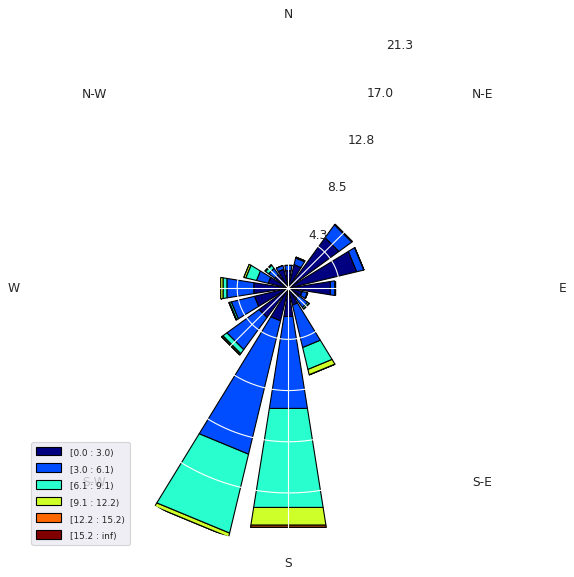

In [0]:
ax = WindroseAxes.from_ax()
ax.bar(df_1['Dm'], df_1['Sm'], normed=True, opening=0.8, edgecolor='black')
ax.set_legend()